# Weight Decay
 

In [16]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch import nn

In [17]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [12]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

#Ex.2:
n_val = 100
val_data = d2l.synthetic_data(true_w, true_b, n_val)
val_iter = d2l.load_array(val_data, batch_size)


In [20]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd}, #weight decay for the weights only
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):   
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())
    print("Train Loss: ", d2l.evaluate_loss(net, train_iter, loss))
    print("Test Loss: ", d2l.evaluate_loss(net, test_iter, loss))
    return (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss))

## Exercises

1. Experiment with the value of $\lambda$ (wd in the code) in the estimation problem in this section. Plot training and test loss as a function of $\lambda$. What do you observe?
1. Use a validation set to find the optimal value of $\lambda$. 
1. What would the update equations look like if instead of $\|\mathbf{w}\|^2$ we used $\sum_i |w_i|$ as our penalty of choice ($L_1$ regularization)?

L2 norm of w: 0.11851230263710022
Train Loss:  0.006505141034722328
Test Loss:  0.21596368476748468


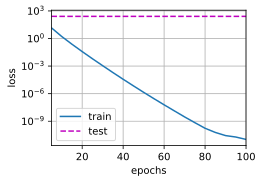

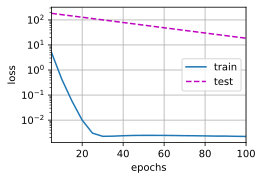

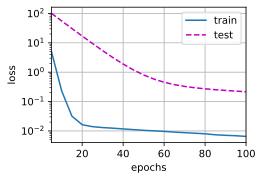

In [22]:
#EX1
import matplotlib.pyplot as plt

%matplotlib inline

wb = [0, 1,  5] 
acc_train_loss = list()
acc_test_loss = list()
 
for l in wb:
    train_loss, test_loss = train_concise(l)
    acc_train_loss.append(train_loss)
    acc_test_loss.append(test_loss)



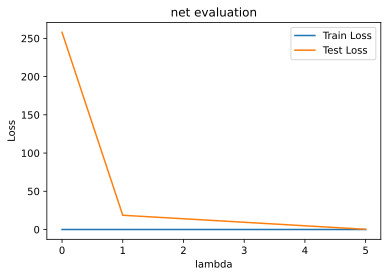

[0, 1, 5]

In [23]:
#EX1, cont.
plt.plot(wb, acc_train_loss, wb, acc_test_loss)
plt.xlabel('lambda')
plt.ylabel('Loss')
plt.title('net evaluation')
plt.legend(['Train Loss', 'Test Loss'])
plt.show()        
wb

In [27]:
#EX 2
def valid_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd}, #weight decay for the weights only
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['validation'])
    for epoch in range(num_epochs):   
        for X, y in val_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, val_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())
    print("Valid Loss: ", d2l.evaluate_loss(net, val_iter, loss))
    return (d2l.evaluate_loss(net, val_iter, loss))

L2 norm of w: 0.046704988926649094
Valid Loss:  0.004681617370806634


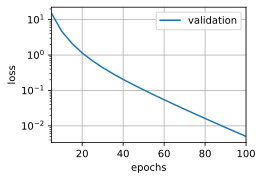

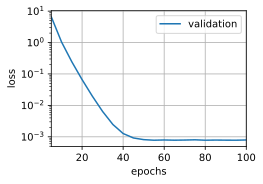

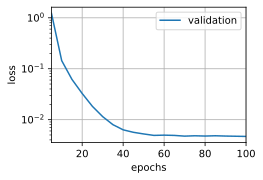

In [28]:
wb = [0, 1,  5] 
acc_val_loss = list()
  
for l in wb:
    val_loss = valid_concise(l)
    acc_val_loss.append(val_loss)
    

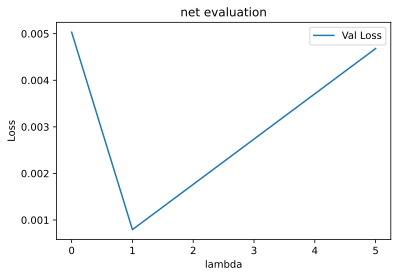

[0, 1, 5]

In [29]:
#EX2, cont.
plt.plot(wb, acc_val_loss)
plt.xlabel('lambda')
plt.ylabel('Loss')
plt.title('net evaluation')
plt.legend(['Val Loss'])
plt.show()        
wb

In [ ]:
#EX3:
loss = nn.L1Loss()